<a href="https://colab.research.google.com/github/osienka/NLP/blob/main/NLP_Sentiment_amazon.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
%tensorflow_version 1.x
import matplotlib.pyplot as plt
import pandas as pd
import re
import string

from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, OrdinalEncoder
from sklearn.model_selection import train_test_split

from keras.models import Sequential
from keras.layers import Dense
import keras

def clean_data(text):
  for i in range(len(text)):
    text[i] = re.sub('\w*\d\w*','', text[i])

#\w - alfanumeric, \d - digit

data = pd.read_csv("amazon.csv")

vectorizer = CountVectorizer(ngram_range = (1,3)).fit(data)
X = vectorizer.fit_transform(data.iloc[:,0])

TensorFlow 1.x selected.


Using TensorFlow backend.


In [2]:
le = LabelEncoder()
Y = le.fit_transform(data.iloc[:, 1])

In [3]:
X.shape

(20000, 615126)

In [4]:
Y.shape
data.iloc[:, 1].value_counts()

1    15233
0     4767
Name: Positive, dtype: int64

In [5]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, stratify = Y)

# create model
model = Sequential()
model.add(Dense(1, input_dim=X.shape[1], activation='sigmoid'))

# compile model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# fit model
mymodel = model.fit(X_train, Y_train, epochs=10, verbose=1, validation_split=0.2)


Instructions for updating:
If using Keras pass *_constraint arguments to layers.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where

Train on 12800 samples, validate on 3200 samples
Epoch 1/10
12800/12800 [==============================] - 41s 3ms/step - loss: 0.4185 - accuracy: 0.8096 - val_loss: 0.3273 - val_accuracy: 0.8666
Epoch 2/10
12800/12800 [==============================] - 47s 4ms/step - loss: 0.1841 - accuracy: 0.9653 - val_loss: 0.2740 - val_accuracy: 0.8947
Epoch 3/10
12800/12800 [==============================] - 43s 3ms/step - loss: 0.1036 - accuracy: 0.9933 - val_loss: 0.2484 - val_accuracy: 0.9094
Epoch 4/10
12800/12800 [==============================] - 41s 3ms/step - loss: 0.0666 - accuracy: 0.9977 - val_loss: 0.2357 - val_accuracy: 0.9097
Epoch 5/10
12800/12800 [==============================] - 42s 3ms/step - loss: 0.0462 - accuracy: 0.9987 - val_loss: 0.2270 - val_accuracy: 0.9109
Epoch 6/10
12800/12800 [================

Test loss: 0.21951831030845642
Test accuracy: 0.9114999771118164


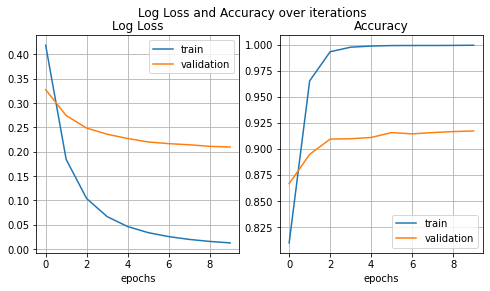

In [6]:
# PLOT LOSS AND ACCURACY HISTORY
def plot_loss_accuracy(loss, val_loss, acc, val_acc):
    fig = plt.figure(figsize=(8, 4))
    fig.suptitle('Log Loss and Accuracy over iterations')
    
    # add_subplot(rows, columns, index)
    ax = fig.add_subplot(1, 2, 1)
    ax.plot(loss)
    ax.plot(val_loss)
    ax.grid(True)
    ax.set(xlabel='epochs', title='Log Loss')
    ax.legend(['train', 'validation'], loc='upper right')
    
    ax = fig.add_subplot(1, 2, 2)
    ax.plot(acc)
    ax.plot(val_acc)
    ax.grid(True)
    ax.set(xlabel='epochs', title='Accuracy')
    ax.legend(['train', 'validation'], loc='lower right')

plot_loss_accuracy(mymodel.history['loss'], 
                   mymodel.history['val_loss'], 
                   mymodel.history['accuracy'], 
                   mymodel.history['val_accuracy']) 

# TEST THE MODEL
loss, accuracy = model.evaluate(X_test, Y_test, verbose=0)
print('Test loss:', loss)
print('Test accuracy:', accuracy)

In [7]:
# TEST THE MODEL
# predict sentiment for a sentence (check the 'not' word)
t = vectorizer.transform(['this was not good and not nice'])
#t = vectorizer.transform(['this was good and nice'])
res = model.predict(t)
if res > 0.5:
    print('positive')
else: print('negative')

# N-GRAMS OF NEGATIVE PREDICTIONS    
# retrieve learned n-grams of 'negative' sentiment predictions from TEST DATASET
predictions = model.predict(X_test)
negatives = [i for i, res in enumerate(predictions) if res <0.5] # get indexes
first_ten_negatives = negatives[:10]

# iterate over 'first_ten_negatives' predictions from X_test (by index) 
# to retrieve the vector of the sentence (as 'doc')
for i in first_ten_negatives:
    doc = X_test[i].toarray().flatten()
    tokens = []
    # if a token (n-gram) is present in 'doc' then add it to the list 'tokens'
    for j in range(len(doc)):
        if doc[j] > 0:
            tokens.append(vectorizer.get_feature_names_out()[j])
    print(tokens,'\n')

negative
['anything', 'anything finally', 'anything finally deleted', 'deleted', 'deleted it', 'deleted it ya', 'finally', 'finally deleted', 'finally deleted it', 'for', 'for me', 'get', 'get it', 'get it it', 'hate', 'hate it', 'hate it never', 'hate it period', 'it', 'it it', 'it it wont', 'it never', 'it never get', 'it period', 'it period hate', 'it wont', 'it wont let', 'it ya', 'it ya for', 'let', 'let record', 'let record anything', 'me', 'never', 'never get', 'never get it', 'period', 'period hate', 'period hate it', 'record', 'record anything', 'record anything finally', 'wont', 'wont let', 'wont let record', 'ya', 'ya for', 'ya for me'] 

['all', 'and', 'and forced', 'and forced closing', 'and it', 'and it performed', 'as', 'as the', 'as the free', 'as well', 'as well as', 'at', 'at all', 'closing', 'closing constant', 'closing constant issue', 'constant', 'constant issue', 'constant issue it', 'droid', 'droid x2', 'droid x2 and', 'forced', 'forced closing', 'forced closing 